Wczytanie danych

In [1]:
import pandas as pd
df = pd.read_csv("IHME_HEALTH_SPENDING_1995_2018_Y2021M09D22.CSV", encoding='latin-1', engine = 'python')

df.head()

,location_id,location_name,iso3,level,year,the_total_mean,the_total_lower,the_total_upper,the_total_ppp_mean,the_total_ppp_lower,...,ghes_per_gdp_upper,ppp_per_gdp_mean,ppp_per_gdp_lower,ppp_per_gdp_upper,oop_per_gdp_mean,oop_per_gdp_lower,oop_per_gdp_upper,dah_per_gdp_mean,dah_per_gdp_lower,dah_per_gdp_upper
0,160,Afghanistan,AFG,Country,1995,528409,417121,665425,2193179,1731272,...,0.004,0.0,0.0,0.0,0.100,0.076,0.129,0.001,0.001,0.001
1,160,Afghanistan,AFG,Country,1996,516915,412035,651034,2145473,1710165,...,0.003,0.0,0.0,0.0,0.096,0.072,0.124,0.001,0.001,0.001
2,160,Afghanistan,AFG,Country,1997,509874,413424,636436,2116248,1715930,...,0.003,0.0,0.0,0.0,0.096,0.075,0.124,0.002,0.002,0.003
3,160,Afghanistan,AFG,Country,1998,485561,394629,605041,2015335,1637919,...,0.003,0.0,0.0,0.0,0.096,0.076,0.123,0.001,0.001,0.001
4,160,Afghanistan,AFG,Country,1999,463720,382723,564170,1924685,1588504,...,0.003,0.0,0.0,0.0,0.096,0.077,0.120,0.002,0.002,0.002


Załadowanie matplotlib

In [2]:
import matplotlib.pyplot as plt

Podgląd danych

In [3]:
df["location_name"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland

In [149]:
d1 = df[df["location_name"] == "Sierra Leone"]
d1[["year","the_total_mean"]]

,year,the_total_mean
3888,1995,161382
3889,1996,148878
3890,1997,130216
3891,1998,135092
3892,1999,132452
3893,2000,163519
3894,2001,171104
3895,2002,201043
3896,2003,217092
3897,2004,227436


Wykres - średnia wydawanych pieniędzy na służbę zdrowia w danym roku w Sierra Leone
(x, y, styl linii)

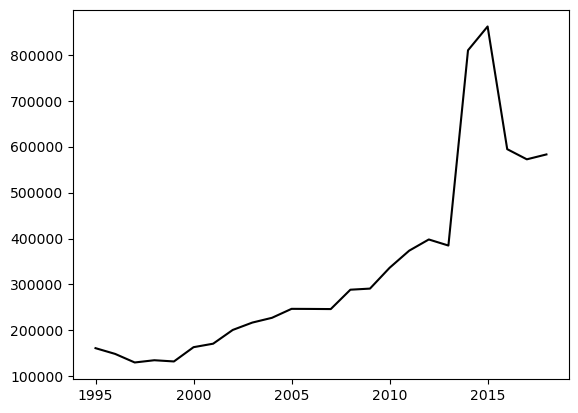

In [150]:
plt.plot(h["year"], d1["the_total_mean"], 'k-')

Różne style rysowania

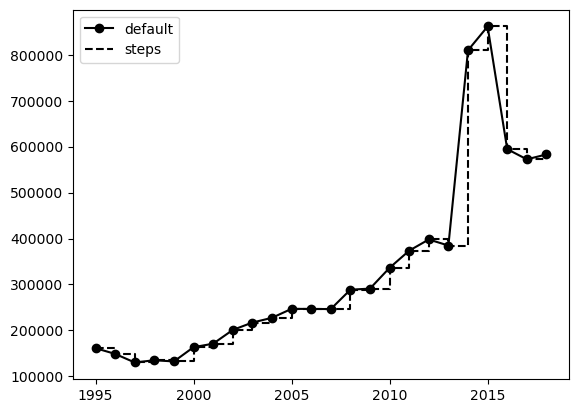

In [151]:
plt.plot(d1["year"], d1["the_total_mean"], 'ko-', label="default")
plt.plot(d1["year"], d1["the_total_mean"], 'k--', drawstyle='steps-post', label="steps")
plt.legend()

Grupy wykresów

(rozmiar x, rozmiar y, identyfikator)

(array([10.,  9.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([0.002 , 0.0147, 0.0274, 0.0401, 0.0528, 0.0655, 0.0782, 0.0909,
        0.1036, 0.1163, 0.129 ]),
 <BarContainer object of 10 artists>)

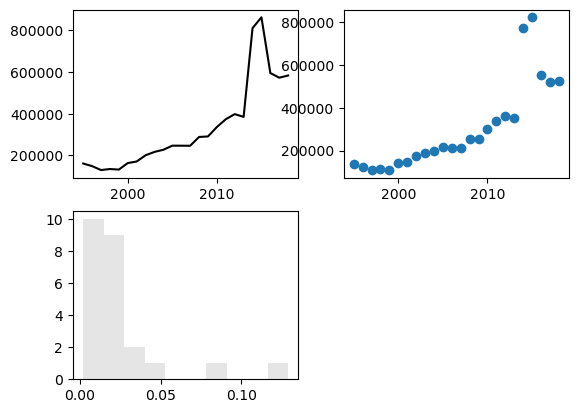

In [153]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax1.plot(d1["year"], d1["the_total_mean"], 'k-')

ax2 = fig.add_subplot(2,2,2)
ax2.scatter(d1["year"], d1["the_total_lower"])

ax3 = fig.add_subplot(2,2,3)
ax3.hist(d1["dah_per_gdp_lower"], bins = 10, color = 'k', alpha=0.1)
#bins = ilość "pól" na wykresie

Legenda i etykiety osi

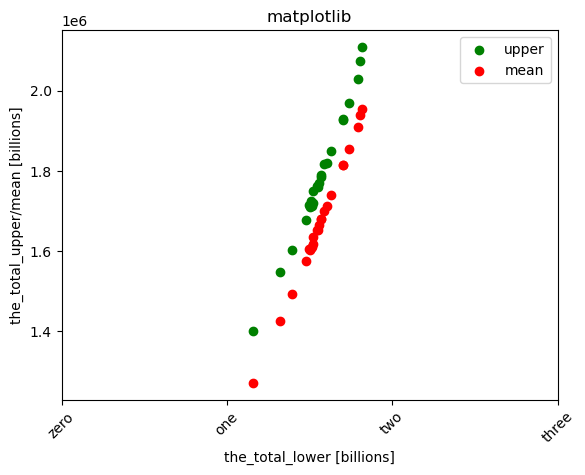

In [154]:
d2 = df[df["location_name"] == "El Salvador"]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(d2["the_total_lower"], d2["the_total_upper"], color='g', label="upper")
ax.scatter(d2["the_total_lower"], d2["the_total_mean"], color='r', label="mean")
ax.set_xticks([0, 1000000, 2000000, 3000000])
ax.set_xticklabels(['zero', 'one', 'two', 'three'], rotation=45, fontsize='medium')
ax.set_title('matplotlib')
ax.set_xlabel('the_total_lower [billions]')
ax.set_ylabel('the_total_upper/mean [billions]')
ax.legend(loc='best')

plt.savefig('figure.png', dpi=400, bbox_inches='tight')

Zapis do pliku

(ścieżka, dpi, ucinanie białych fragmentów wokół obrazu)

Zapis musi być wykonany przed wyświetleniem, inaczej obraz będzie pusty - (wyświetlenie czyści wykres)

In [9]:
plt.savefig('figure.png', dpi=400, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

Wykresy pandas

<AxesSubplot:>

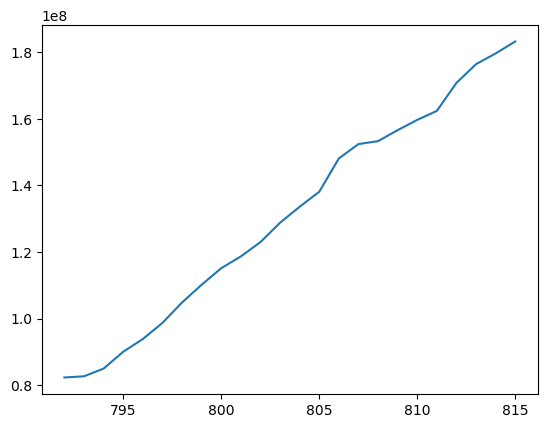

In [155]:
d3 = df[df["location_name"] == "Canada"]

figure = pd.Series(d3["the_total_mean"])
figure.plot()

<AxesSubplot:xlabel='year'>

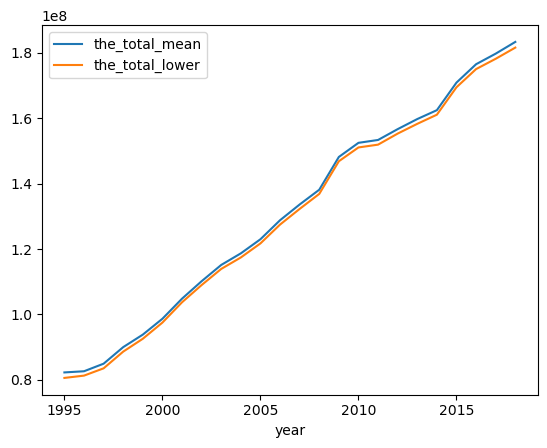

In [161]:
d4 = d3[["the_total_mean", "the_total_lower", "year"]]
figure = d4
figure.plot(x = "year")

Wykresy kolumnowe

<AxesSubplot:>

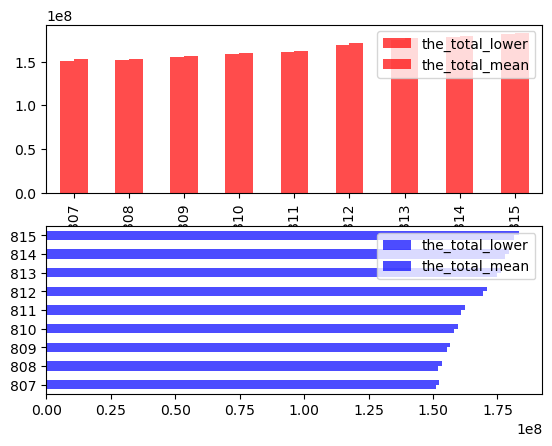

In [162]:
fig, axes = plt.subplots(2, 1)
d5 = d4[d4["year"] > 2009]
d5 = d5[["the_total_lower", "the_total_mean"]]
data = d5
data.plot.bar(ax=axes[0], color='r', alpha=0.7) #rysowanie w pionie
data.plot.barh(ax=axes[1], color='b', alpha=0.7) #rysowanie w poziomie

In [165]:
d6 = df[df["year"] > 2015]
d6 = d6[["the_total_upper", "the_total_ppp_lower"]]
d6 = d6.head(10)
d6

,the_total_upper,the_total_ppp_lower
21,2028013,7253099
22,2142606,7709396
23,2207902,7779658
45,738868,1795580
46,779525,1872224
47,838110,1990826
69,10365602,30006433
70,10242469,29389584
71,10379786,28755496
93,36712,27535


<AxesSubplot:>

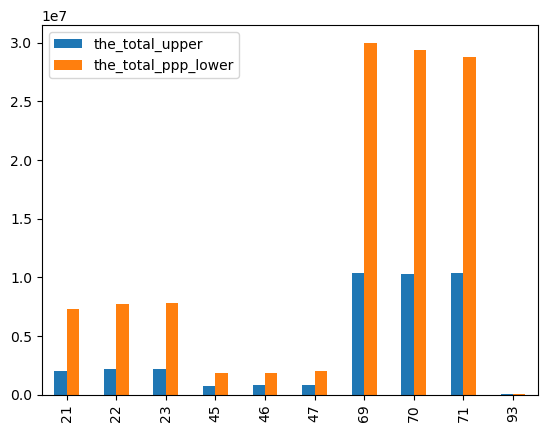

In [166]:
d6.plot.bar()

<AxesSubplot:>

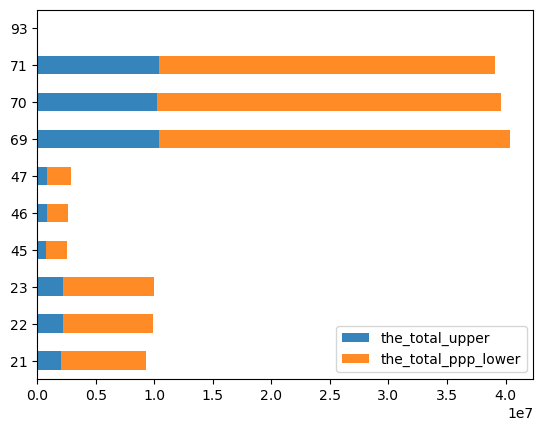

In [167]:
d6.plot.barh(stacked=True, alpha=0.9)

Seaborn

In [177]:
import seaborn as sbn

In [178]:
d7 = df
d7 = d7[d7["year"]> 2006]
d7

,location_id,location_name,iso3,level,year,the_total_mean,the_total_lower,the_total_upper,the_total_ppp_mean,the_total_ppp_lower,...,ghes_per_gdp_upper,ppp_per_gdp_mean,ppp_per_gdp_lower,ppp_per_gdp_upper,oop_per_gdp_mean,oop_per_gdp_lower,oop_per_gdp_upper,dah_per_gdp_mean,dah_per_gdp_lower,dah_per_gdp_upper
12,160,Afghanistan,AFG,Country,2007,1040372,956086,1141413,4318097,3968264,...,0.007,0.000,0.000,0.000,0.079,0.067,0.092,0.020,0.018,0.021
13,160,Afghanistan,AFG,Country,2008,1066858,982415,1161963,4428026,4077542,...,0.007,0.000,0.000,0.000,0.078,0.069,0.089,0.020,0.018,0.021
14,160,Afghanistan,AFG,Country,2009,1236730,1149054,1337448,5133088,4769186,...,0.006,0.000,0.000,0.000,0.071,0.064,0.079,0.025,0.024,0.025
15,160,Afghanistan,AFG,Country,2010,1262196,1166456,1364153,5238783,4841414,...,0.006,0.000,0.000,0.000,0.067,0.059,0.076,0.022,0.020,0.023
16,160,Afghanistan,AFG,Country,2011,1373092,1273961,1482720,5699060,5287617,...,0.006,0.000,0.000,0.000,0.066,0.059,0.074,0.025,0.025,0.026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,166,Sub-Saharan Africa,S3,GBD Super Regions,2014,71349683,69713253,73018691,181884773,177924201,...,0.018,0.008,0.008,0.009,0.016,0.016,0.017,0.007,0.007,0.007
5228,166,Sub-Saharan Africa,S3,GBD Super Regions,2015,73465621,71828527,75186691,186871835,182854383,...,0.018,0.009,0.008,0.009,0.017,0.016,0.017,0.007,0.007,0.007
5229,166,Sub-Saharan Africa,S3,GBD Super Regions,2016,73972108,72267558,75733371,188137002,183830602,...,0.018,0.009,0.008,0.009,0.017,0.016,0.017,0.006,0.006,0.007
5230,166,Sub-Saharan Africa,S3,GBD Super Regions,2017,77406545,75367505,79506397,196856498,191771222,...,0.018,0.008,0.008,0.009,0.017,0.016,0.018,0.007,0.007,0.007


<AxesSubplot:xlabel='the_total_mean', ylabel='year'>

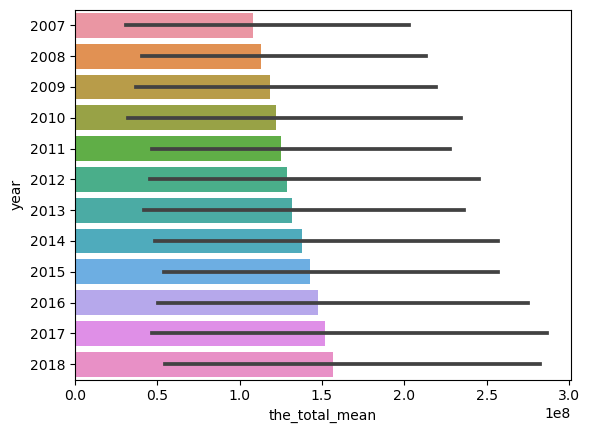

In [179]:
sbn.barplot(x='the_total_mean', y='year', data=d7, orient='h')
#automatycznie wyświetla przedział ufności

<AxesSubplot:xlabel='the_total_mean', ylabel='year'>

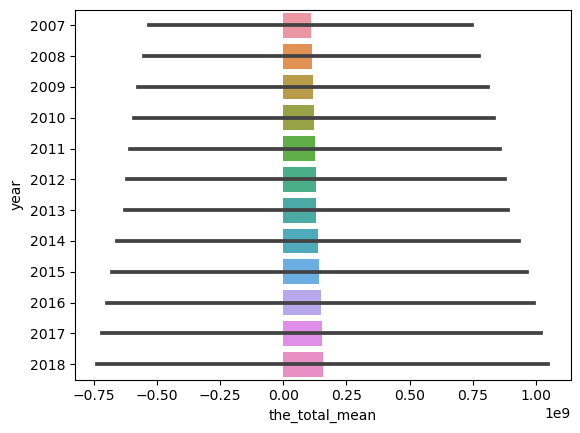

In [180]:
sbn.barplot(x='the_total_mean', y='year', data=d7, orient='h', ci='sd')
#wersja z std dev

Dodanie nowej wartości kategorycznej
hue

<AxesSubplot:xlabel='the_total_mean', ylabel='year'>

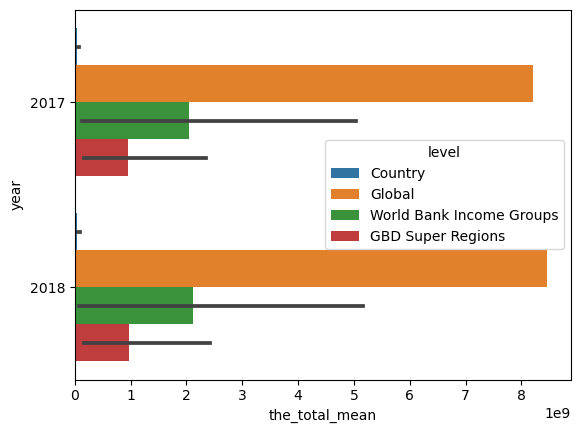

In [182]:
d7 = d7[d7["year"] > 2016]
sbn.barplot(x='the_total_mean', y='year', hue='level', data=d7, orient='h')

Histogram

In [183]:
d8 = df[df["year"] > 2017]
d8 = d8["dah_per_gdp_mean"]
d8

23      0.013
47      0.001
71      0.000
95      0.000
119     0.000
        ...  
5135    0.000
5182    0.001
5183    0.001
5207    0.000
5231    0.006
Name: dah_per_gdp_mean, Length: 218, dtype: float64

<AxesSubplot:ylabel='Frequency'>

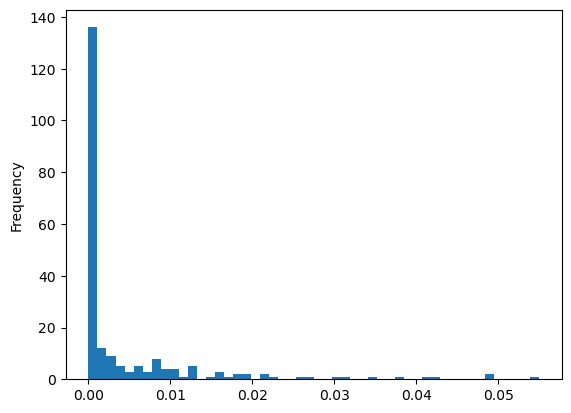

In [184]:
d8.plot.hist(bins=50)

Wykres gęstości - wykres prawdopodbieństwa obserwowanych danych

<AxesSubplot:ylabel='Density'>

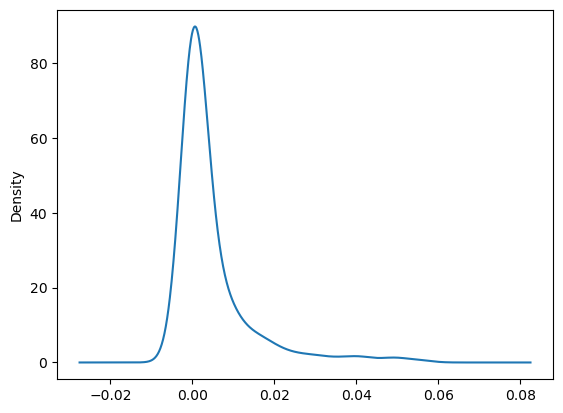

In [185]:
d8.plot.kde()

<AxesSubplot:ylabel='Density'>

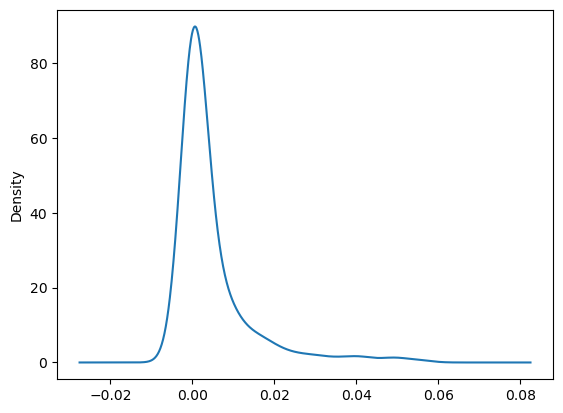

In [186]:
d8.plot.density()

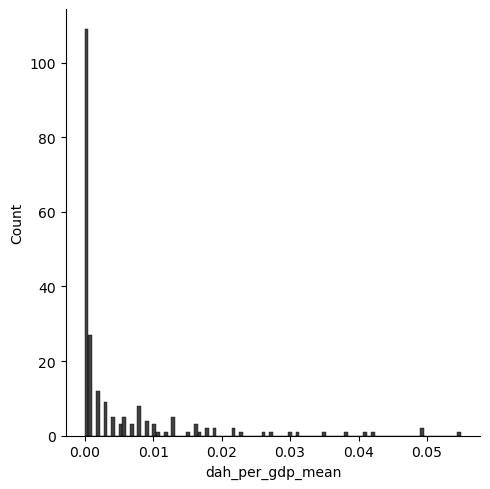

In [187]:
sbn.displot(d8, bins=100, color='k')

<AxesSubplot:xlabel='dah_per_gdp_mean', ylabel='Count'>

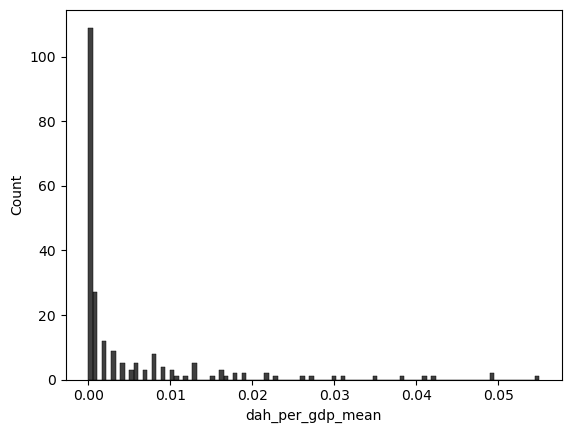

In [188]:
sbn.histplot(d8, bins=100, color='k')

Wykresy punktowe i bitowe

In [189]:
d9 = df
d9 = d9[d9["year"] > 2012]
d9

,location_id,location_name,iso3,level,year,the_total_mean,the_total_lower,the_total_upper,the_total_ppp_mean,the_total_ppp_lower,...,ghes_per_gdp_upper,ppp_per_gdp_mean,ppp_per_gdp_lower,ppp_per_gdp_upper,oop_per_gdp_mean,oop_per_gdp_lower,oop_per_gdp_upper,dah_per_gdp_mean,dah_per_gdp_lower,dah_per_gdp_upper
18,160,Afghanistan,AFG,Country,2013,1554494,1435933,1674751,6451977,5959885,...,0.006,0.000,0.000,0.000,0.068,0.060,0.076,0.019,0.018,0.020
19,160,Afghanistan,AFG,Country,2014,1664981,1541417,1800126,6910557,6397700,...,0.006,0.000,0.000,0.000,0.074,0.066,0.083,0.017,0.016,0.018
20,160,Afghanistan,AFG,Country,2015,1822293,1693212,1960564,7563486,7027729,...,0.007,0.000,0.000,0.000,0.083,0.074,0.094,0.017,0.016,0.018
21,160,Afghanistan,AFG,Country,2016,1882415,1747511,2028013,7813023,7253099,...,0.007,0.000,0.000,0.000,0.091,0.081,0.103,0.010,0.009,0.010
22,160,Afghanistan,AFG,Country,2017,1992736,1857448,2142606,8270915,7709396,...,0.007,0.000,0.000,0.000,0.094,0.083,0.106,0.009,0.009,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5227,166,Sub-Saharan Africa,S3,GBD Super Regions,2014,71349683,69713253,73018691,181884773,177924201,...,0.018,0.008,0.008,0.009,0.016,0.016,0.017,0.007,0.007,0.007
5228,166,Sub-Saharan Africa,S3,GBD Super Regions,2015,73465621,71828527,75186691,186871835,182854383,...,0.018,0.009,0.008,0.009,0.017,0.016,0.017,0.007,0.007,0.007
5229,166,Sub-Saharan Africa,S3,GBD Super Regions,2016,73972108,72267558,75733371,188137002,183830602,...,0.018,0.009,0.008,0.009,0.017,0.016,0.017,0.006,0.006,0.007
5230,166,Sub-Saharan Africa,S3,GBD Super Regions,2017,77406545,75367505,79506397,196856498,191771222,...,0.018,0.008,0.008,0.009,0.017,0.016,0.018,0.007,0.007,0.007


Text(0.5, 1.0, 'oop per gdp mean od dah per gdp mean')

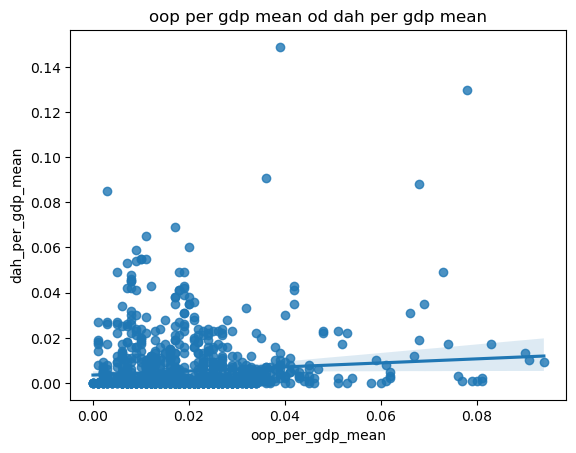

In [190]:
sbn.regplot(x='oop_per_gdp_mean', y='dah_per_gdp_mean', data=d9)
plt.title('oop per gdp mean od dah per gdp mean'.format('oop_per_gdp_mean', 'dah_per_gdp_mean'))

Macierz wykresów

In [191]:
d10 = df
d10 = d10[d10["year"] > 2010].head(50)
d10 = d10[["the_total_mean", "the_total_ppp_mean", "dah_per_gdp_mean", "oop_per_gdp_mean"]]
d10

,the_total_mean,the_total_ppp_mean,dah_per_gdp_mean,oop_per_gdp_mean
16,1373092,5699060,0.025,0.066
17,1410474,5854216,0.019,0.065
18,1554494,6451977,0.019,0.068
19,1664981,6910557,0.017,0.074
20,1822293,7563486,0.017,0.083
21,1882415,7813023,0.010,0.091
22,1992736,8270915,0.009,0.094
23,2037487,8456655,0.013,0.090
40,639655,1782716,0.003,0.025
41,641496,1787846,0.001,0.026


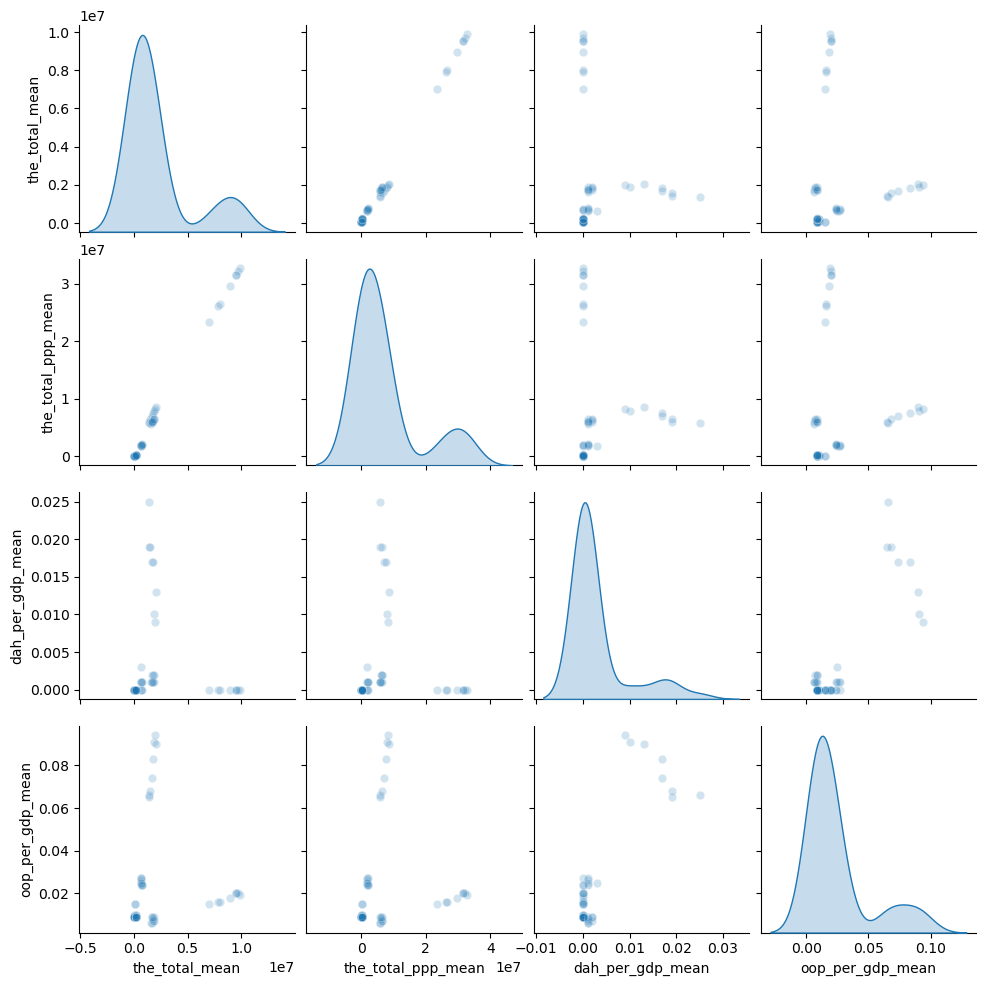

In [192]:
sbn.pairplot(d10, diag_kind='kde', plot_kws={'alpha': 0.2})

Dane kategoryczne

In [193]:
d11 = df
d11 = d11[(d11["iso3"] == "S3") | (d11["iso3"] == "USA")  | (d11["iso3"] == "CHN")]
d11 = d11[d11["year"] > 2010]
d11

,location_id,location_name,iso3,level,year,the_total_mean,the_total_lower,the_total_upper,the_total_ppp_mean,the_total_ppp_lower,...,ghes_per_gdp_upper,ppp_per_gdp_mean,ppp_per_gdp_lower,ppp_per_gdp_upper,oop_per_gdp_mean,oop_per_gdp_lower,oop_per_gdp_upper,dah_per_gdp_mean,dah_per_gdp_lower,dah_per_gdp_upper
904,6,China,CHN,Country,2011,394499221,363955067,425030458,626159671,577679176,...,0.026,0.003,0.002,0.004,0.018,0.016,0.020,0.000,0.000,0.000
905,6,China,CHN,Country,2012,438607436,408300708,470912636,696169404,648065757,...,0.028,0.003,0.002,0.003,0.018,0.016,0.021,0.000,0.000,0.000
906,6,China,CHN,Country,2013,481628318,451394063,515950870,764453293,716464679,...,0.029,0.002,0.002,0.003,0.018,0.016,0.020,0.000,0.000,0.000
907,6,China,CHN,Country,2014,525586094,494048109,558205692,834224246,784166316,...,0.030,0.003,0.002,0.003,0.018,0.016,0.020,0.000,0.000,0.000
908,6,China,CHN,Country,2015,584192485,551263247,618708603,927245871,874979707,...,0.031,0.003,0.002,0.003,0.018,0.016,0.020,0.000,0.000,0.000
909,6,China,CHN,Country,2016,632511907,600721292,665591927,1003939743,953480833,...,0.031,0.003,0.002,0.004,0.018,0.016,0.020,0.000,0.000,0.000
910,6,China,CHN,Country,2017,677343796,644644563,710047114,1075098112,1023197018,...,0.031,0.004,0.003,0.004,0.018,0.017,0.020,0.000,0.000,0.000
911,6,China,CHN,Country,2018,738123387,699261899,777328486,1171569098,1109887108,...,0.031,0.004,0.003,0.005,0.018,0.016,0.020,0.000,0.000,0.000
4696,102,United States of America,USA,Country,2011,2944162745,2890250905,2997085936,2944162745,2890250905,...,0.081,0.064,0.062,0.066,0.020,0.018,0.022,0.000,0.000,0.000
4697,102,United States of America,USA,Country,2012,2997075946,2948522176,3051844586,2997075946,2948522176,...,0.081,0.064,0.062,0.066,0.020,0.018,0.021,0.000,0.000,0.000


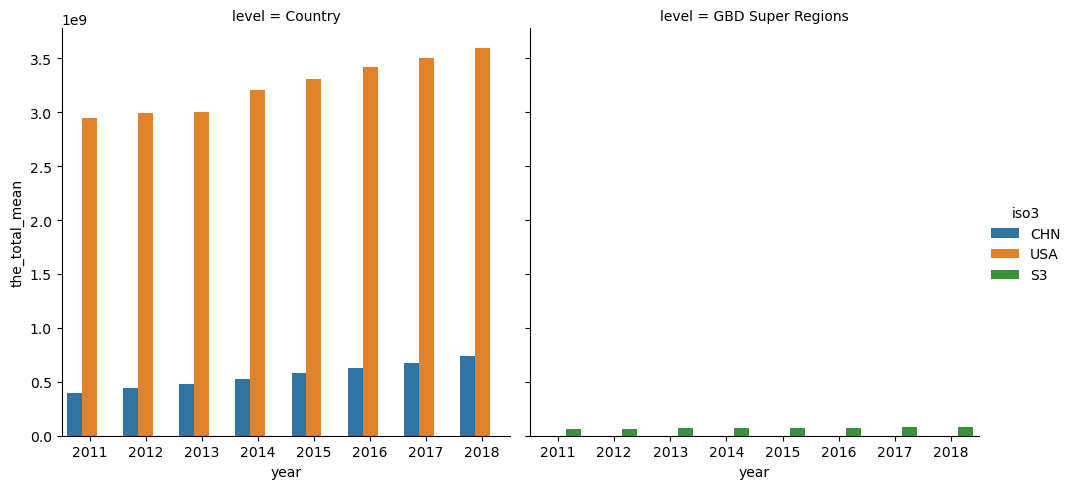

In [194]:
sbn.catplot(x='year', y='the_total_mean', hue='iso3', col='level', kind='bar', data=d11)
#danymi kategoryzującymi jest level

Siatka aspektów

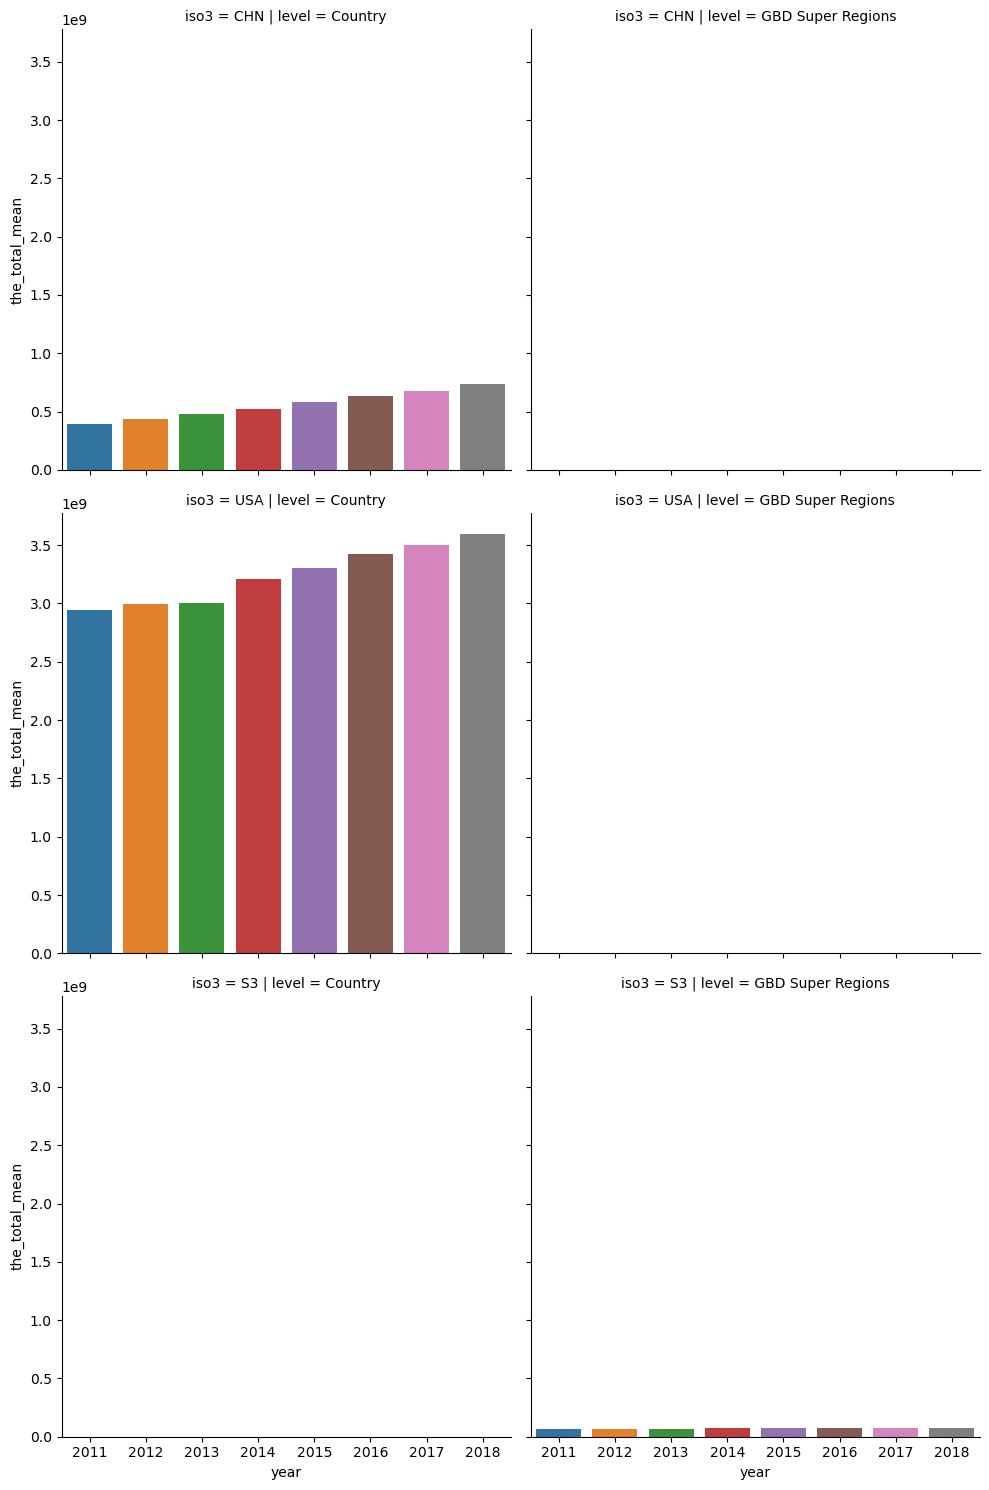

In [207]:
sbn.catplot(x='year', y='the_total_mean', row='iso3', col='level', kind='bar', data=d11)

Wykresy blokowe

In [249]:
d12 = df[df["year"] > 2014]
d12 = d12[(d12["location_name"] == "Albania") | (d12["location_name"] == "Egypt") | 
          (d12["location_name"] == "Latvia") | (d12["location_name"] == "Netherlands")]
d12

,location_id,location_name,iso3,level,year,the_total_mean,the_total_lower,the_total_upper,the_total_ppp_mean,the_total_ppp_lower,...,ghes_per_gdp_upper,ppp_per_gdp_mean,ppp_per_gdp_lower,ppp_per_gdp_upper,oop_per_gdp_mean,oop_per_gdp_lower,oop_per_gdp_upper,dah_per_gdp_mean,dah_per_gdp_lower,dah_per_gdp_upper
44,43,Albania,ALB,Country,2015,689829,646378,738745,1922550,1801451,...,0.031,0.000,0.000,0.000,0.025,0.022,0.027,0.001,0.001,0.001
45,43,Albania,ALB,Country,2016,690713,644271,738868,1925014,1795580,...,0.031,0.000,0.000,0.000,0.024,0.021,0.026,0.000,0.000,0.000
46,43,Albania,ALB,Country,2017,724906,671771,779525,2020310,1872224,...,0.032,0.000,0.000,0.000,0.024,0.021,0.027,0.000,0.000,0.000
47,43,Albania,ALB,Country,2018,773638,714327,838110,2156125,1990826,...,0.033,0.000,0.000,0.000,0.024,0.021,0.027,0.001,0.001,0.001
1340,141,Egypt,EGY,Country,2015,15071072,14381859,15742578,53832053,51370268,...,0.018,0.005,0.004,0.007,0.032,0.028,0.034,0.000,0.000,0.000
1341,141,Egypt,EGY,Country,2016,16078051,15343614,16813419,57428863,54805543,...,0.019,0.006,0.004,0.008,0.032,0.029,0.035,0.000,0.000,0.000
1342,141,Egypt,EGY,Country,2017,16881770,16125703,17698948,60299650,57599069,...,0.019,0.006,0.004,0.008,0.033,0.030,0.036,0.000,0.000,0.000
1343,141,Egypt,EGY,Country,2018,16764374,15786043,17787561,59880326,56385846,...,0.018,0.005,0.004,0.007,0.032,0.029,0.035,0.001,0.001,0.001
2372,59,Latvia,LVA,Country,2015,1801007,1753510,1853748,3195725,3111446,...,0.035,0.001,0.000,0.001,0.024,0.022,0.025,0.000,0.000,0.000
2373,59,Latvia,LVA,Country,2016,1897400,1847688,1946688,3366766,3278556,...,0.035,0.000,0.000,0.001,0.025,0.024,0.026,0.000,0.000,0.000


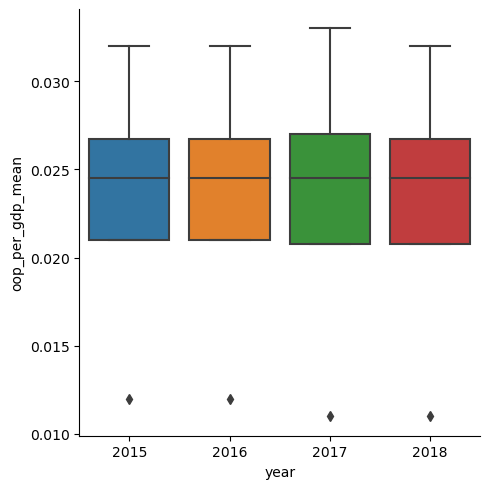

In [250]:
sbn.catplot(x='year', y='oop_per_gdp_mean', kind='box', data=d12)
#mediana, kwartyle, wartości odstające